In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


# New Section

In [ ]:
df = pd.read_csv("/content/netflix_titles (2).csv")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df['release_year'].head()

,release_year
0,2020
1,2021
2,2021
3,2021
4,2021


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [ ]:
#data cleaning(Drop the columns show_id,description,cast) because it consist of identifier & it just does NLP,often no need
df.drop(columns=['show_id','description'],inplace=True,errors='ignore')
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [ ]:
#convert date_added to  date time format
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')
df['date_added'].head()

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24


In [ ]:
 #to extract year and month from date_added
 df['year']=df['date_added'].dt.year
 df['month']=df['date_added'].dt.month
 df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year,month
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021.0,9.0
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021.0,9.0
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021.0,9.0
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021.0,9.0
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021.0,9.0


In [ ]:
#to find the missing values
df.isnull().sum()

,0
type,0
title,0
director,2634
cast,825
country,831
date_added,98
release_year,0
rating,4
duration,3
listed_in,0


In [ ]:
df[df.isnull().any(axis=1)]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year,month
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021.0,9.0
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021.0,9.0
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021.0,9.0
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021.0,9.0
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",2018.0,5.0
8796,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017.0,1.0
8797,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018.0,9.0
8800,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016.0,12.0


In [ ]:
#to fill the founded missing values
df['rating'].fillna('Unknown',inplace=True)
df['country'].fillna('Unkown',inplace=True)
df['cast'].fillna('Unkown',inplace=True)
df['director'].fillna('Unkown',inplace=True)

/tmp/ipython-input-119-3420985966.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-119-3420985966.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=Tru

clean duration col

In [ ]:
df['duration'].fillna('0',inplace=True)
df['num_dur']=df['duration'].str.extract('(\d+)').astype(int)
df['type_dur']=df['duration'].str.extract('([a-zA-Z]+)')
df.head()

/tmp/ipython-input-120-3492252173.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year,month,num_dur,type_dur
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unkown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021.0,9.0,90,min
1,TV Show,Blood & Water,Unkown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021.0,9.0,2,Seasons
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unkown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021.0,9.0,1,Season
3,TV Show,Jailbirds New Orleans,Unkown,Unkown,Unkown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021.0,9.0,1,Season
4,TV Show,Kota Factory,Unkown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021.0,9.0,2,Seasons


In [ ]:
df['content_age']=2025-df['release_year']

In [ ]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year,month,num_dur,type_dur,content_age
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unkown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021.0,9.0,90,min,5
1,TV Show,Blood & Water,Unkown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021.0,9.0,2,Seasons,4
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unkown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021.0,9.0,1,Season,4
3,TV Show,Jailbirds New Orleans,Unkown,Unkown,Unkown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021.0,9.0,1,Season,4
4,TV Show,Kota Factory,Unkown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021.0,9.0,2,Seasons,4


In [ ]:
#for data aggregation and grouping
df.groupby('type')['title'].count()

,title
type,
Movie,6131
TV Show,2676


In [ ]:
df.groupby(['release_year','type'])['title'].count().reset_index()

,release_year,type,title
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277


In [ ]:
df.tail()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year,month,num_dur,type_dur,content_age
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers",2019.0,11.0,158,min,18
8803,TV Show,Zombie Dumb,Unkown,Unkown,Unkown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",2019.0,7.0,2,Seasons,7
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",2019.0,11.0,88,min,16
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies",2020.0,1.0,88,min,19
8806,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019.0,3.0,111,min,10


In [ ]:
df.shape

(8807, 15)

**Graphs**

*Line graph of content added per year*

In [ ]:
cont_per_yr=df['year'].value_counts().sort_index()

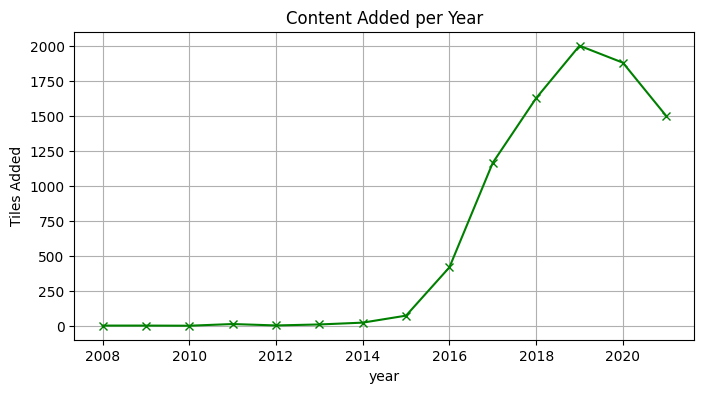

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(cont_per_yr.index,cont_per_yr.values,marker='x',linestyle='solid',color='green')
plt.title("Content Added per Year")
plt.xlabel("year")
plt.ylabel("Tiles Added")
plt.grid()
plt.show()

*heat map of country vs content type*

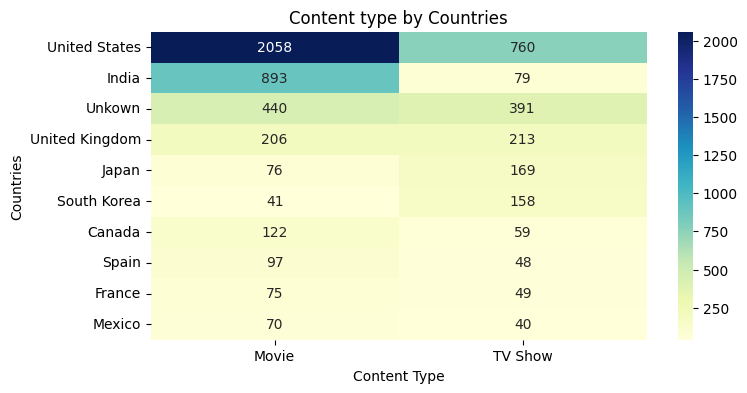

In [ ]:
#heatmap of top 10 countries to check what type of content they prefer most
#to grup the countries and its types
countries = df.groupby('country')['type'].value_counts().unstack().fillna(0)
#it creates a total col (num of titles per country) and sums the no. of titles
countries['Total']=countries.sum(axis=1)
countries = countries.sort_values('Total', ascending=False).drop(columns='Total')
top_c=countries.head(10)
plt.figure(figsize=(8,4))
sns.heatmap(top_c,annot=True,fmt='.0f',cmap='YlGnBu')
plt.title('Content type by Countries')
plt.xlabel('Content Type')
plt.ylabel('Countries')
plt.xticks()
plt.yticks()
plt.show()

In [ ]:
#common genres
df=df.dropna(subset=['listed_in'])

In [ ]:
#split the values in listed in col using comma
df['listed_in']=df['listed_in'].str.split(',')

In [ ]:
#stores those splited values into a variable/name
genre=df['listed_in']
#use explode() to copy all values repatedly
genre=df.explode('listed_in')

/tmp/ipython-input-133-3789249637.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




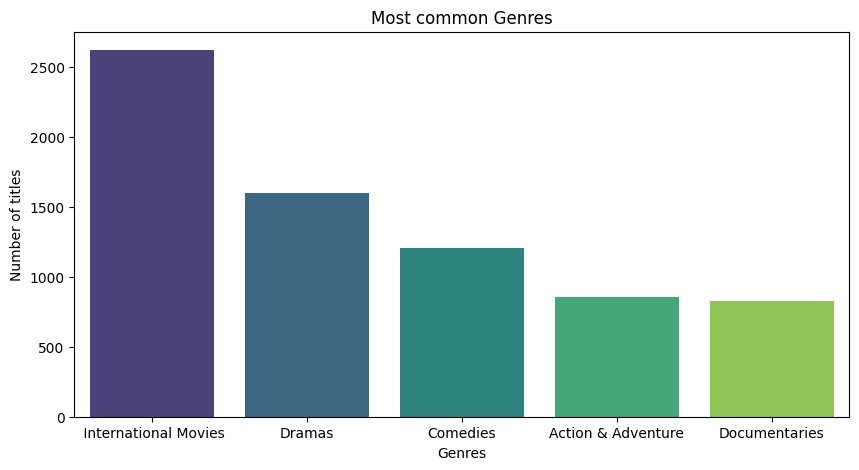

In [ ]:
# using bar graph
genre_count = genre['listed_in'].value_counts().head().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='listed_in', y='count', data=genre_count, palette='viridis')
plt.title("Most common Genres")
plt.xlabel('Genres')
plt.ylabel('Number of titles')
plt.xticks()
plt.show()

In [ ]:
#creating new column and mapping values to the new column
rating_desc= {
    'NR': 'Not Rated',
    'TV-G': 'TV - General Audience',
    'TV-Y': 'TV - Young Children',
    'TV-Y7': 'TV - Older Children (7+)',
    'G': 'General Audience',
    'PG': 'Parental Guidance Suggested (8+)',
    'PG-13': 'Parents Strongly Cautioned (13+)',
    'TV-PG': 'TV - Parental Guidance (10+)',
    'TV-14': 'TV - Teens (14+)',
    'R': 'Restricted (17+)',
    'TV-MA': 'TV - Mature Audience (17+)',
    'NC-17': 'Adults Only (18+)',
}
df['rating_stands_for']=df['rating'].map(rating_desc)
#fill the missing values
df['rating_stands_for'].fillna('Unknown Rating')
df['rating_stands_for'].head()
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year,month,num_dur,type_dur,content_age,rating_stands_for
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unkown,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],2021.0,9.0,90,min,5,Parents Strongly Cautioned (13+)
1,TV Show,Blood & Water,Unkown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...",2021.0,9.0,2,Seasons,4,TV - Mature Audience (17+)
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unkown,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",2021.0,9.0,1,Season,4,TV - Mature Audience (17+)
3,TV Show,Jailbirds New Orleans,Unkown,Unkown,Unkown,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]",2021.0,9.0,1,Season,4,TV - Mature Audience (17+)
4,TV Show,Kota Factory,Unkown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",2021.0,9.0,2,Seasons,4,TV - Mature Audience (17+)


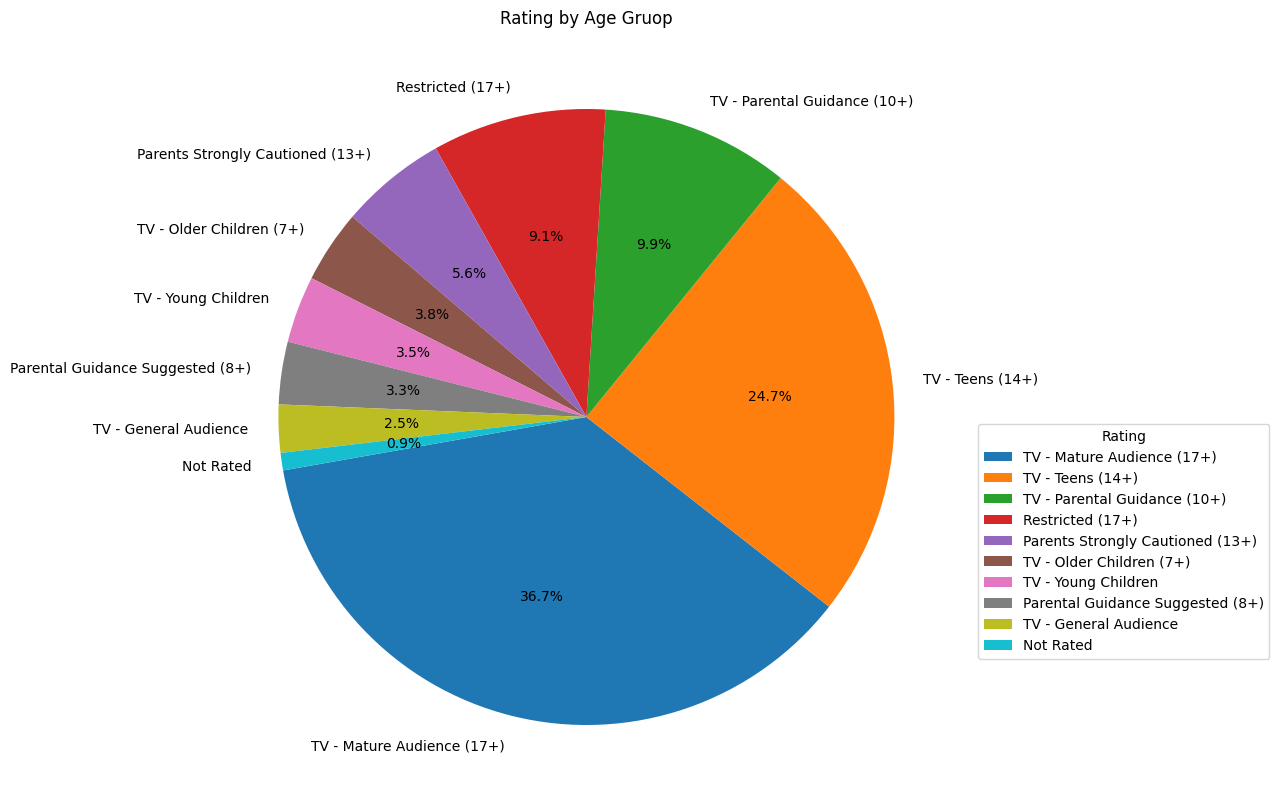

In [ ]:
#Pie chart for ratings
rating = df['rating_stands_for'].value_counts().head(10)
rating.plot.pie(autopct='%1.1f%%',figsize=(10,10), startangle=190)
plt.ylabel("")
plt.legend(
    labels=rating.index,
    title="Rating",
    loc="upper left",
    bbox_to_anchor=(1, 0.5)
)
plt.title("Rating by Age Gruop");
plt.show()

Installing Plotly for treemaps

In [ ]:
pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
# collecting  data for treemap
genre_type_count = genre.groupby(['type', 'listed_in']).size().reset_index(name='count')
#colors:
colors_for_content={
    'Movie': 'rgba(0,123,255,0.8)',
    'TV show': 'rgba(255,0,0,0)'
}
# Creating from collected data treemap
fig = px.treemap(
    genre_type_count,
    path=['type', 'listed_in'],
    values='count',
    color='type',
    color_discrete_map=colors_for_content,
    title='Treemap of Genres by Movies & TV shows(Content Type)'
)

fig.show()

In [ ]:
plt.figure(figsize=(10,5))
for country in top_c: #using loop to reach each country
  countries = df[df['country']==country]

<Figure size 1000x500 with 0 Axes>

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#pre calculation for content added per year
yearly_titles=pd.DataFrame()
yearly_titles = countries.groupby('year').size().reset_index(name='count')
yearly_titles

,year,count


In [ ]:
# Using pre-calculated yearly content count
# reshaping the values to 2D for LR
x = cont_per_yr.index.values.reshape(-1, 1)
y = cont_per_yr.values
# Creating a Linear Regression model
graph = LinearRegression()
graph.fit(x, y)

#now the model is trained!

LinearRegression()

In [ ]:
forecasted_years=np.arange(x.min(),x.max()+6).reshape(-1,1)
pred = graph.predict(forecasted_years)

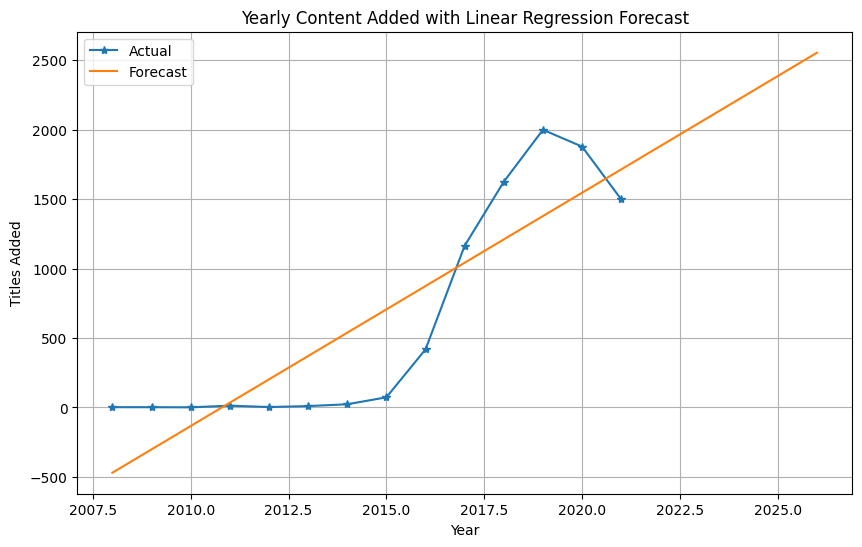

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(cont_per_yr.index, cont_per_yr.values, marker='*', label='Actual')
plt.plot(forecasted_years, pred, linestyle='-', label='Forecast')

plt.title("Yearly Content Added with Linear Regression Forecast")
plt.xlabel("Year")
plt.ylabel("Titles Added")
plt.legend()
plt.grid(True) # using grid to get better realibility
plt.show()

In [ ]:
movies=df[df['type']=='Movie'].copy()

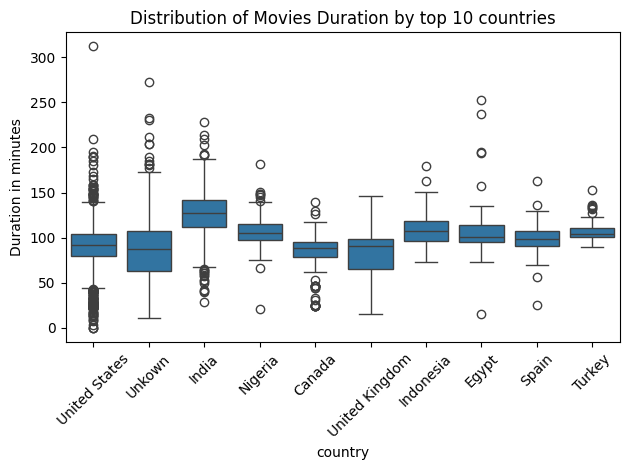

In [ ]:
#Box plot of movie duration by each country/top 10 country
top_c = movies['country'].value_counts().head(10).index
#  filter rows crctly and creating copy
df_top_c = movies[movies['country'].isin(top_c)]
# Using the filtered DataFrame and num_dur
sns.boxplot(x='country',y='num_dur',data=df_top_c)
plt.title("Distribution of Movies Duration by top 10 countries")
plt.ylabel("Duration in minutes") # Corrected label based on num_dur
plt.xlabel("country")
plt.xticks(rotation=45)
plt.tight_layout() # it prevents the labels to not overlap
plt.show()

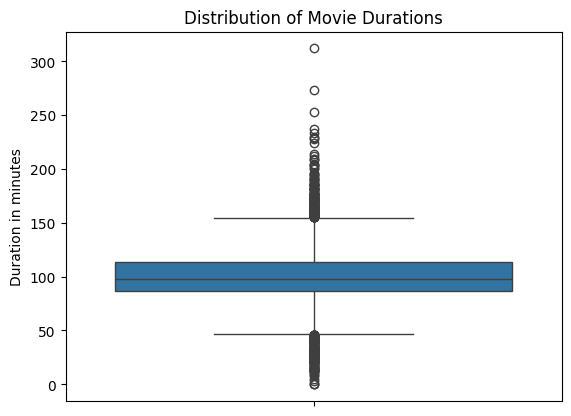

In [ ]:
#box plot to display the distribution of movie durations
sns.boxplot(y='num_dur', data=movies)
plt.title("Distribution of Movie Duration in minutes")
plt.ylabel("Duration in minutes")
plt.show()